In [1]:
# Pre-Proccessing 

import os
import cv2
import numpy as np
from skimage import io

def resize_image(image, target_size=(224, 224)):
    """Resize image to the desired target size using OpenCV."""
    return cv2.resize(image, target_size)

def gaussian_blur(image, ksize=(5, 5), sigma=1.5):
    """Apply Gaussian blur to reduce noise."""
    return cv2.GaussianBlur(image, ksize, sigma)

def preprocess_and_save_images(input_dir, output_dir, target_size=(224, 224)):
    """
    Read all images from `input_dir`, resize, apply Gaussian blur, and 
    save them to `output_dir`.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)
        
        # Skip sub-directories or any non-image file
        if os.path.isdir(image_path):
            continue
        
        # Read the image (using skimage)
        image = io.imread(image_path)
        
        # Resize + Gaussian blur
        resized_image = resize_image(image, target_size)
        blurred_image = gaussian_blur(resized_image)
        
        # Save preprocessed image
        output_image_path = os.path.join(output_dir, image_name)
        cv2.imwrite(output_image_path, blurred_image)
        
        print(f"Processed and saved: {image_name}")

In [2]:
# paths for dataset
input_dataset_path = "/kaggle/input/messidor2preprocess/messidor-2/messidor-2/preprocess"
output_preprocessed_path = "/kaggle/working/messidor2_preprocessed"

# Preprocess images (resize + blur) and save
preprocess_and_save_images(input_dataset_path, output_preprocessed_path)

Processed and saved: IM002135.JPG
Processed and saved: 20060530_51279_0100_PP.png
Processed and saved: 20060412_52497_0200_PP.png
Processed and saved: IM000264.JPG
Processed and saved: 20060412_61299_0200_PP.png
Processed and saved: 20060522_45935_0100_PP.png
Processed and saved: IM001174.JPG
Processed and saved: 20051110_37992_0400_PP.png
Processed and saved: IM004494.JPG
Processed and saved: IM000769.JPG
Processed and saved: 20051205_59510_0400_PP.png
Processed and saved: 20060407_45494_0200_PP.png
Processed and saved: 20060410_40481_0200_PP.png
Processed and saved: 20060523_49100_0100_PP.png
Processed and saved: 20060523_45548_0100_PP.png
Processed and saved: 20051020_44982_0100_PP.png
Processed and saved: 20051130_55037_0400_PP.png
Processed and saved: IM004252.JPG
Processed and saved: IM003795.JPG
Processed and saved: 20051214_51071_0100_PP.png
Processed and saved: 20051205_33012_0400_PP.png
Processed and saved: 20060523_49269_0100_PP.png
Processed and saved: 20060412_60573_0200_P

In [3]:
#Feature Extraction Techniques 

from skimage.feature import local_binary_pattern, hog
from skimage import exposure
import matplotlib.pyplot as plt

def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return hog_image_rescaled

def extract_lbp_features(image, radius=1, n_points=8):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 59), range=(0, 58))
    lbp_hist = lbp_hist.astype(float)
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    return lbp_hist

def extract_sift_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
    return img_with_keypoints

def plot_feature_extraction_results(original_image, hog_image, lbp_histogram, sift_image):
    plt.figure(figsize=(12, 8))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for plotting
    plt.title('Original Image')
    plt.axis('off')

    # HOG
    plt.subplot(2, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    # LBP Histogram
    plt.subplot(2, 2, 3)
    plt.plot(lbp_histogram)
    plt.title('LBP Histogram')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')

    # SIFT
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def process_and_plot_image(image_path):
    image = io.imread(image_path)
    
    if len(image.shape) == 2:  # Grayscale
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    elif image.shape[2] == 4:  # RGBA
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGR)
        
    # Extract features
    hog_image = extract_hog_features(image)
    lbp_histogram = extract_lbp_features(image)
    sift_image = extract_sift_features(image)

    # Plot
    plot_feature_extraction_results(image, hog_image, lbp_histogram, sift_image)

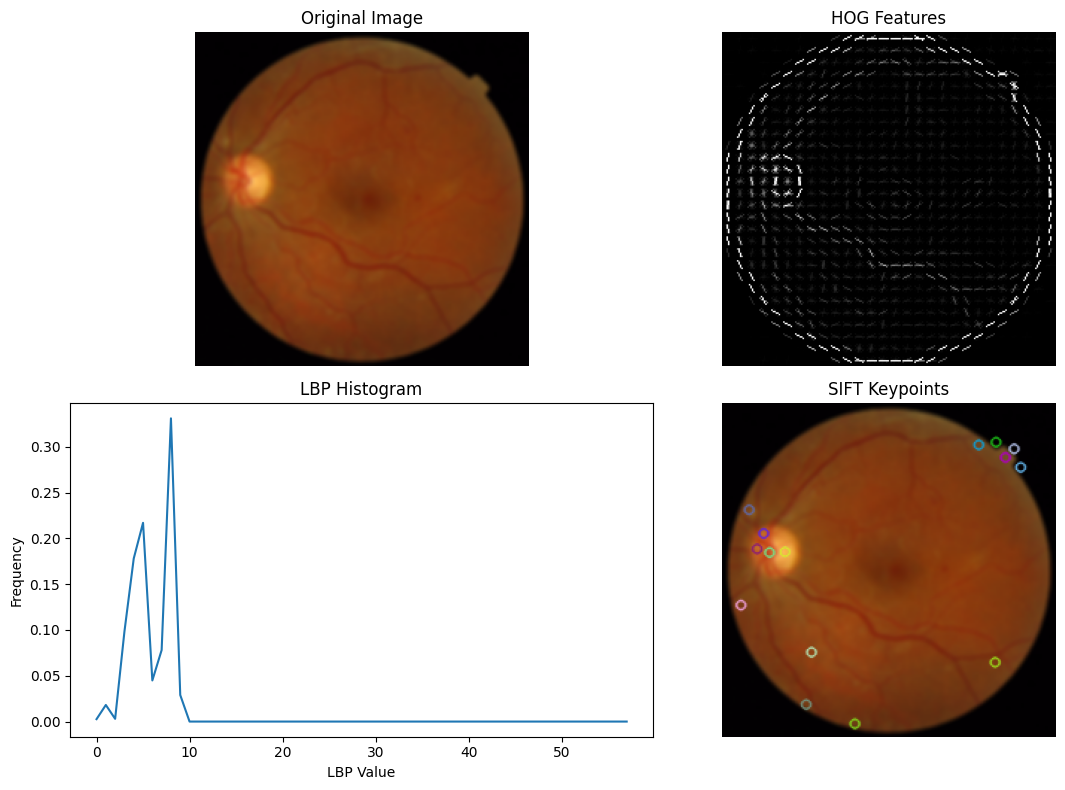

In [4]:
sample_image_name = "/kaggle/working/messidor2_preprocessed/20051020_62878_0100_PP.png"
sample_image_path = os.path.join(output_preprocessed_path, sample_image_name)

# Visualize
process_and_plot_image(sample_image_path)

**1. Histogram of Oriented Gradients (HOG)**

***Concept:*** 
HOG captures edge and gradient information from an image by computing the direction and magnitude of pixel gradients in local regions. The gradients are then binned into histograms, providing a robust descriptor of object shapes.

***Applications:*** 
HOG can be used to detect abnormalities in medical images like retinal scans or X-rays. For instance, it can help detect irregular shapes or lesions in the retina for diabetic retinopathy detection.


**2. Local Binary Patterns (LBP)**

***Concept:*** LBP is a texture descriptor that compares each pixel with its neighbors. It encodes the result as a binary pattern and creates a histogram of these patterns to represent texture information.

***Applications:*** LBP can be used for tumor classification in MRI scans or CT scans by distinguishing between healthy and abnormal tissue based on texture patterns, such as detecting subtle changes in the skin or brain tissue.




**3. Scale-Invariant Feature Transform (SIFT)**

***Concept:*** SIFT detects distinctive key points in images that are invariant to scale, rotation, and partially to illumination changes. Each key point is described by a feature vector based on local gradients.

***Applications:*** SIFT can help in matching and aligning 3D scans (e.g., in CT or MRI) to detect tumors or lesions across different scans or timepoints, making it useful in monitoring disease progression.


# ***Sample Discussion***

***1. HOG*** shows global edge orientation structure and highlights strong gradients around the disc and vessel edges.

***2.LBP*** reveals dominant local textures, showing a strong bias toward smoother, uniform texture codes typical of retinal tissue.

***3.SIFT*** pinpoints specific keypoints around strong local contrasts, especially near the optic disc and some vessel crossings.




**These feature descriptors (HOG, LBP, SIFT) each capture different aspects of the image:**

- HOG → edge/gradient patterns in a somewhat global sense.
- LBP → local texture patterns, summarized in a histogram.
- SIFT → distinct keypoints that can be matched or used for image alignment, or to describe local patches.

In [5]:
#ResNet Model
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image

# Define image transformations for ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Safe to ensure final size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def load_images(image_dir, transform):
    """
    Loads all .jpg (or other) images from `image_dir`,
    applies given transforms, and returns a single tensor plus file paths.
    """
    images = []
    image_paths = []
    for img_name in os.listdir(image_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(image_dir, img_name)
            image = Image.open(img_path).convert("RGB")
            image = transform(image)
            images.append(image)
            image_paths.append(img_path)

    if len(images) == 0:
        raise ValueError(f"No images found in {image_dir}")

    return torch.stack(images), image_paths

all_images, all_paths = load_images(output_preprocessed_path, transform)

# Create a DataLoader
data_loader = DataLoader(all_images, batch_size=32, shuffle=False)

# Load ResNet50 (pretrained)
resnet_model = models.resnet50(pretrained=True)
# Remove the final classification layer (FC) to get raw features of size 2048
resnet_model = torch.nn.Sequential(*list(resnet_model.children())[:-1])
resnet_model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

@torch.no_grad()
def extract_features(dataloader, model):
    feature_list = []

    for batch_images in dataloader:
        batch_images = batch_images.to(device)
        outputs = model(batch_images)               # shape: [batch_size, 2048, 1, 1]
        outputs = outputs.view(outputs.size(0), -1) # shape: [batch_size, 2048]
        feature_list.append(outputs.cpu())
    
    # Combine all features into one tensor of shape [N, 2048]
    features = torch.cat(feature_list, dim=0)
    return features

# Extract features
all_features = extract_features(data_loader, resnet_model)

print("Feature extraction completed!")
print(f"Extracted features shape: {all_features.shape}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s] 


Feature extraction completed!
Extracted features shape: torch.Size([1744, 2048])


**Advantages:**

1. Transfer Learning Efficiency:


* Pretrained models are already trained on large datasets. This allows them to learn useful and generalized features, which can be directly applied to related tasks.

* By reusing pretrained models, you can avoid training a model from scratch, saving significant time.

2. Improved Performance:

* Since pretrained models are trained on large, diverse datasets, they often extract high-quality, robust features that lead to better performance on downstream tasks, even with small datasets.

3. Reduced Data Requirements:

* Training a model from scratch requires a large amount of labeled data. Pretrained models mitigate this by requiring only a smaller labeled dataset for fine-tuning or task-specific learning.


**Limitations:**

1. Domain Mismatch:

* If the domain of the pretrained model's training data is significantly different from the target domain (e.g., a model trained on natural images applied to medical images), the extracted features may not be relevant or effective.


2. Overfitting on Small Datasets:

* When fine-tuning a pretrained model with a small dataset, there is a risk of overfitting, especially if the pretrained features are not sufficiently generalized for the target task.

Found 1057 images. Processing & saving enhanced versions...


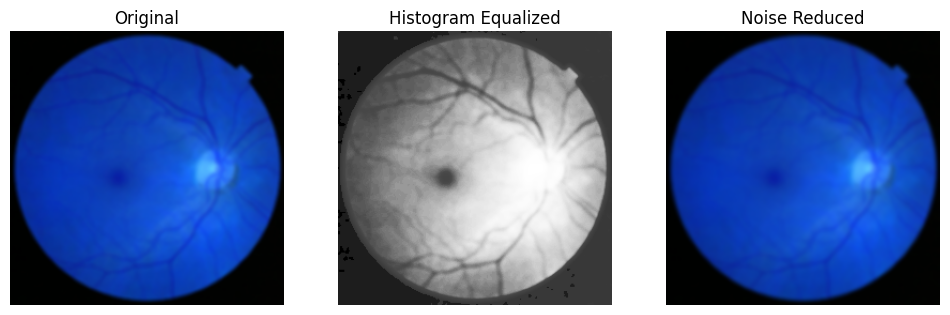

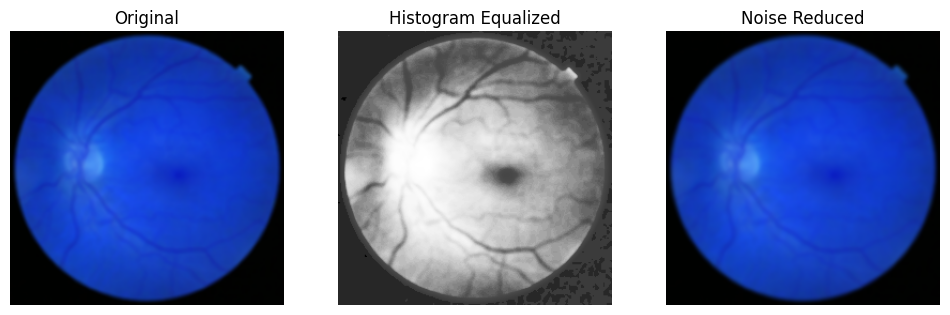

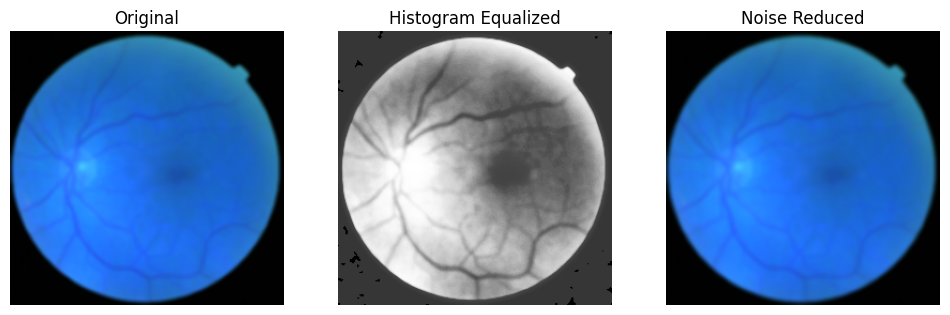

Image enhancement completed. Enhanced images saved in: /kaggle/working/messidor2_enhanced


In [6]:
#Image Enhancement

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Define dataset paths
input_path = "/kaggle/working/messidor2_preprocessed"  # Original images (pre-processed images)
output_path = "/kaggle/working/messidor2_enhanced"  # Save enhanced images

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Step 2: Get all image file names
image_files = [f for f in os.listdir(input_path) if f.endswith(('.jpg', '.png'))]
if len(image_files) == 0:
    raise ValueError("No images found in the dataset path!")

print(f"Found {len(image_files)} images. Processing & saving enhanced versions...")

# Step 3: Process and Save Each Image
for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_path, image_file)
    
    # Load the image
    original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Resize image for uniformity
    resized_image = cv2.resize(original_image, (256, 256))

    # 1. Apply Histogram Equalization (Grayscale)
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)

    # 2. Apply Noise Reduction (Gaussian Blur)
    noise_reduced_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

    # Save enhanced images
    enhanced_image_path = os.path.join(output_path, image_file)

    # Convert grayscale equalized image back to RGB for consistency
    final_equalized = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)

    # Save the noise reduced image (Final Enhanced Version)
    cv2.imwrite(enhanced_image_path, cv2.cvtColor(noise_reduced_image, cv2.COLOR_RGB2BGR))  # Save in BGR format

    # Show sample images
    if i < 3:  # Show only the first 3 images
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 3, 1)
        plt.title("Original")
        plt.imshow(resized_image)
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Histogram Equalized")
        plt.imshow(final_equalized)
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Noise Reduced")
        plt.imshow(noise_reduced_image)
        plt.axis('off')

        plt.show()

print(f"Image enhancement completed. Enhanced images saved in: {output_path}")

# **Rational behind choosing enhancment**

**1. Histogram Equalization**
- Improves Contrast: Redistributes intensity levels to enhance visibility in underexposed or overexposed areas.
  
- Enhances Feature Visibility: Makes fine details more prominent, especially in subtle regions.

  
- Versatility: Effective for a wide range of applications, such as medical imaging or satellite data.

  
- Efficiency: Computationally simple and effective for real-time applications.

  
**2. Noise Reduction**
- Removes Artifacts: Suppresses unwanted noise caused by environmental or sensor limitations.
  
- Improves Clarity: Produces cleaner, sharper images that are visually appealing and easier to analyze.

  
- Preserves Details: Advanced methods reduce noise without losing critical image information.

## Comparative Analysis
### 1. Feature Analysis
Features were extracted from the original images, images after histogram enhancement, and images after noise reduction. The histogram was used as a means to evaluate the distribution of pixel values in the images.
### 2. Results
- **Original Images**: The histogram shows the distribution of pixel values, with certain concentrations for shadows and highlights.
- **Enhanced Images**: After applying histogram equalization, a better balance in the value distribution is observed, indicating an improvement in contrast.
- **Noise Reduced Images**: The histogram for the color values after noise reduction shows a good balance, with a reduction in outlier values.
### 3. Conclusion
The results indicate that histogram enhancement and noise reduction have a positive impact on image quality, which affects the extracted features. This improvement can be beneficial in applications such as classification or object detection.

In [9]:
# Classification Model

import os
import pandas as pd
import numpy as np
import cv2

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1) Helper Functions
def load_images_and_labels(image_dir, csv_file, target_size=(256, 256)):
    """
    Loads images from `image_dir` using filenames from `csv_file`.
    The CSV must have columns: 'id_code' and 'diagnosis'.
    Returns:
      - images (numpy array): shape = (num_samples, H, W, 3)
      - labels (numpy array): shape = (num_samples,)
    """
    df = pd.read_csv(csv_file)
    
    all_images = []
    all_labels = []
    
    for _, row in df.iterrows():
        # Image filename
        img_name = row["id_code"]  
        # Label
        label = row["diagnosis"]  
        
        img_path = os.path.join(image_dir, img_name)
        if not os.path.exists(img_path):
            print(f"Warning: {img_path} not found. Skipping.")
            continue
        
        # Load the image (BGR by default)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read {img_path}. Skipping.")
            continue
        
        # Resize to match the target size (256×256)
        img = cv2.resize(img, target_size)
        # Convert BGR -> RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Normalize to [0,1]
        img = img.astype(np.float32) / 255.0
        
        all_images.append(img)
        all_labels.append(label)
    
    return np.array(all_images), np.array(all_labels)

def flatten_data(X):
    """
    Flatten image data from (N, H, W, C) to (N, H*W*C).
    """
    return X.reshape(len(X), -1)

def build_simple_cnn(input_shape=(256,256,3), num_classes=1):
    """
    Builds a simple CNN for binary classification.
    If you have multi-class, adjust num_classes & activation accordingly.
    """
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        
        Dense(num_classes, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def evaluate_metrics(y_true, y_pred, model_name, dataset_type, average='macro'):
    """
    Evaluates accuracy, precision, recall, and F1-score for a model.
    Handles both binary and multiclass classification.
    Prints the results.
    
    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - model_name: Name of the model (string)
    - dataset_type: Type of dataset (e.g., "Pre-processed", "Enhanced")
    - average: Averaging method for multiclass metrics ('micro', 'macro', 'weighted', or None)
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    
    print(f"[{model_name}] Metrics ({dataset_type}):")
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f} (average='{average}')")
    print(f"  Recall:    {recall:.3f} (average='{average}')")
    print(f"  F1-Score:  {f1:.3f} (average='{average}')")
    
    return accuracy, precision, recall, f1


# 2) Paths & Data Loading
csv_file = "/kaggle/input/messidor2preprocess/messidor_data.csv"            # CSV file
preprocessed_dir = "/kaggle/working/messidor2_preprocessed"  # directory for preprocessed images
enhanced_dir = "/kaggle/working/messidor2_enhanced"         # directory for enhanced images

# Load Pre-processed Images
X_pre, y_pre = load_images_and_labels(
    image_dir=preprocessed_dir,
    csv_file=csv_file,
    target_size=(256, 256)
)

# Load Enhanced Images
X_enh, y_enh = load_images_and_labels(
    image_dir=enhanced_dir,
    csv_file=csv_file,
    target_size=(256, 256)
)

# 3) Train-Test Split
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(
    X_pre, y_pre,
    test_size=0.2,
    stratify=y_pre,
    random_state=42
)

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enh, y_enh,
    test_size=0.2,
    stratify=y_enh,
    random_state=42
)


# 4A) Classification with SVM
# Flatten images for classical ML
X_train_pre_flat = flatten_data(X_train_pre)
X_test_pre_flat  = flatten_data(X_test_pre)
X_train_enh_flat = flatten_data(X_train_enh)
X_test_enh_flat  = flatten_data(X_test_enh)

# -- SVM on pre-processed images --
svm_pre = SVC(kernel='linear', random_state=42)
svm_pre.fit(X_train_pre_flat, y_train_pre)
y_pred_pre_svm = svm_pre.predict(X_test_pre_flat)
acc_pre_svm, prec_pre_svm, rec_pre_svm, f1_pre_svm = evaluate_metrics(
    y_test_pre, y_pred_pre_svm, "SVM", "Pre-processed"
)

# -- SVM on enhanced images --
svm_enh = SVC(kernel='linear', random_state=42)
svm_enh.fit(X_train_enh_flat, y_train_enh)
y_pred_enh_svm = svm_enh.predict(X_test_enh_flat)
acc_enh_svm, prec_enh_svm, rec_enh_svm, f1_enh_svm = evaluate_metrics(
    y_test_enh, y_pred_enh_svm, "SVM", "Enhanced"
)


# 4B) Classification with Random Forest
rf_pre = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pre.fit(X_train_pre_flat, y_train_pre)
y_pred_pre_rf = rf_pre.predict(X_test_pre_flat)
acc_pre_rf, prec_pre_rf, rec_pre_rf, f1_pre_rf = evaluate_metrics(
    y_test_pre, y_pred_pre_rf, "Random Forest", "Pre-processed"
)

rf_enh = RandomForestClassifier(n_estimators=100, random_state=42)
rf_enh.fit(X_train_enh_flat, y_train_enh)
y_pred_enh_rf = rf_enh.predict(X_test_enh_flat)
acc_enh_rf, prec_enh_rf, rec_enh_rf, f1_enh_rf = evaluate_metrics(
    y_test_enh, y_pred_enh_rf, "Random Forest", "Enhanced"
)


# 4C) Classification with CNN
# -- CNN on pre-processed images --
cnn_pre = build_simple_cnn(input_shape=(256,256,3), num_classes=1)  # binary classification
cnn_pre.fit(
    X_train_pre, y_train_pre,
    epochs=5,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)
y_pred_pre_cnn = (cnn_pre.predict(X_test_pre) > 0.5).astype(int).reshape(-1)  # Predict and threshold binary outputs
acc_pre_cnn, prec_pre_cnn, rec_pre_cnn, f1_pre_cnn = evaluate_metrics(
    y_test_pre, y_pred_pre_cnn, "CNN", "Pre-processed"
)

# -- CNN on enhanced images --
cnn_enh = build_simple_cnn(input_shape=(256,256,3), num_classes=1)
cnn_enh.fit(
    X_train_enh, y_train_enh,
    epochs=5,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)
y_pred_enh_cnn = (cnn_enh.predict(X_test_enh) > 0.5).astype(int).reshape(-1)  # Predict and threshold binary outputs
acc_enh_cnn, prec_enh_cnn, rec_enh_cnn, f1_enh_cnn = evaluate_metrics(
    y_test_enh, y_pred_enh_cnn, "CNN", "Enhanced"
)


# 5) Print Summary of Results
print("\n--- Final Results Comparison ---")
print("SVM Metrics:")
print(f"  Pre-processed: Accuracy={acc_pre_svm:.3f}, Precision={prec_pre_svm:.3f}, Recall={rec_pre_svm:.3f}, F1-Score={f1_pre_svm:.3f}")
print(f"  Enhanced:      Accuracy={acc_enh_svm:.3f}, Precision={prec_enh_svm:.3f}, Recall={rec_enh_svm:.3f}, F1-Score={f1_enh_svm:.3f}")

print("\nRandom Forest Metrics:")
print(f"  Pre-processed: Accuracy={acc_pre_rf:.3f}, Precision={prec_pre_rf:.3f}, Recall={rec_pre_rf:.3f}, F1-Score={f1_pre_rf:.3f}")
print(f"  Enhanced:      Accuracy={acc_enh_rf:.3f}, Precision={prec_enh_rf:.3f}, Recall={rec_enh_rf:.3f}, F1-Score={f1_enh_rf:.3f}")

print("\nCNN Metrics:")
print(f"  Pre-processed: Accuracy={acc_pre_cnn:.3f}, Precision={prec_pre_cnn:.3f}, Recall={rec_pre_cnn:.3f}, F1-Score={f1_pre_cnn:.3f}")
print(f"  Enhanced:      Accuracy={acc_enh_cnn:.3f}, Precision={prec_enh_cnn:.3f}, Recall={rec_enh_cnn:.3f}, F1-Score={f1_enh_cnn:.3f}")

[SVM] Metrics (Pre-processed):
  Accuracy:  0.524
  Precision: 0.294 (average='macro')
  Recall:    0.277 (average='macro')
  F1-Score:  0.282 (average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[SVM] Metrics (Enhanced):
  Accuracy:  0.420
  Precision: 0.249 (average='macro')
  Recall:    0.249 (average='macro')
  F1-Score:  0.246 (average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Random Forest] Metrics (Pre-processed):
  Accuracy:  0.602
  Precision: 0.260 (average='macro')
  Recall:    0.259 (average='macro')
  F1-Score:  0.247 (average='macro')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[Random Forest] Metrics (Enhanced):
  Accuracy:  0.467
  Precision: 0.414 (average='macro')
  Recall:    0.262 (average='macro')
  F1-Score:  0.252 (average='macro')
Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.2512 - loss: 1.4077 - val_accuracy: 0.1720 - val_loss: 0.5651
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1509 - loss: 0.4698 - val_accuracy: 0.3333 - val_loss: 0.2498
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2619 - loss: 0.5337 - val_accuracy: 0.1720 - val_loss: -0.2238
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1874 - loss: 0.6838 - val_accuracy: 0.1971 - val_loss: -0.8930
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1729 - loss: -0.6123 - val_accuracy: 0.1756 - val_loss: 0.4829
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step
[CNN] Metrics (Pre-processed):
  Accuracy:  0.152
  Precision: 0.030 (average='macro')
  Recall:    0.196 (average='macro')
  F1-Score:  0.053 (average='macro

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.2037 - loss: 2.0245 - val_accuracy: 0.1834 - val_loss: -7.8294
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2245 - loss: -17.6033 - val_accuracy: 0.1834 - val_loss: -26.0513
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.2055 - loss: -37.5135 - val_accuracy: 0.1834 - val_loss: -50.2295
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2007 - loss: -108.7338 - val_accuracy: 0.1834 - val_loss: -361.2517
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1984 - loss: -418.7741 - val_accuracy: 0.1834 - val_loss: -2380.4260
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step
[CNN] Metrics (Enhanced):
  Accuracy:  0.198
  Precision: 0.040 (average='macro')
  Recall:    0.200 (average='macro')
  F1-Score:  0.066 (average='macro')

--- Final Results Comparison ---
SVM Metrics:
  Pre-processed: Accuracy=0.524, Precision=0.294, Recall=0.277, F1-Score=0.282
  Enhanced:      Accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
